In [1]:
from python_workflow_definition.aiida import write_workflow_json, construct_wg_simple
from python_workflow_definition.pyiron_base import load_workflow_json

from aiida import load_profile
load_profile()

workflow_json_filename =  "workflow_simple_aiida.json"

In [2]:
from simple_workflow import add_x_and_y, add_x_and_y_and_z

In [3]:
wg = construct_wg_simple(
    add_x_and_y_func=add_x_and_y, add_x_and_y_and_z_func=add_x_and_y_and_z
)

In [4]:
write_workflow_json(wg=wg, file_name=workflow_json_filename)


{'nodes': {0: 1,
  1: 2,
  2: 'simple_workflow.add_x_and_y',
  3: 'simple_workflow.add_x_and_y_and_z'},
 'edges': [{'source': 0,
   'target': 2,
   'sourceHandle': None,
   'targetHandle': 'x'},
  {'source': 1, 'target': 2, 'sourceHandle': None, 'targetHandle': 'y'},
  {'source': 2, 'target': 3, 'sourceHandle': 'x', 'targetHandle': 'x'},
  {'source': 2, 'target': 3, 'sourceHandle': 'y', 'targetHandle': 'y'},
  {'source': 2, 'target': 3, 'sourceHandle': 'z', 'targetHandle': 'z'}]}

In [5]:
from pyiron_base import Project


0it [00:00, ?it/s]

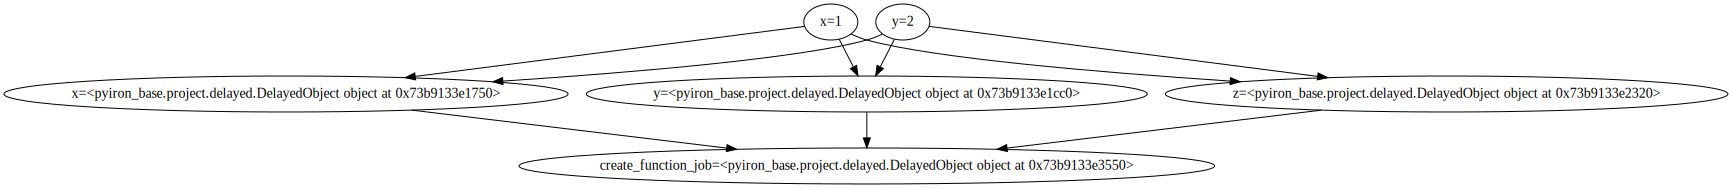

In [6]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)


delayed_object = load_workflow_json(project=pr, file_name=workflow_json_filename)
delayed_object.draw()

In [7]:
delayed_object.pull()

The job add_x_and_y_68901482a2c5221cc845f828aabebd27 was saved and received the ID: 2
The job add_x_and_y_and_z_b671e81aaa4670d81d7eee509650af8d was saved and received the ID: 3


6